In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from sklearn.datasets import load_digits, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from ml_lib import KMeans as KMeansFromTemu
import matplotlib.pyplot as plt

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)

ckmeans = KMeansFromTemu(n_clusters=4) 
kmeans = KMeans(n_clusters=4)

y_pred_ckmeans = ckmeans.fit_predict(X)
y_pred_kmeans = kmeans.fit_predict(X)

In [4]:
centroids_ckmeans = ckmeans.get_params['centroids']
centroids_kmeans = kmeans.cluster_centers_

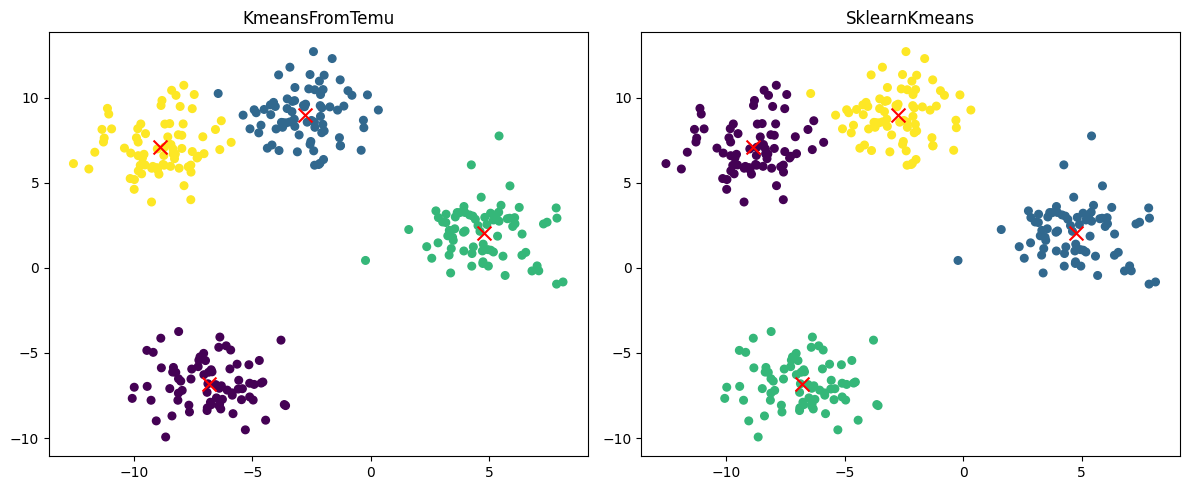

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:,0], X[:,1], c=y_pred_ckmeans, cmap='viridis', s=30)
ax1.scatter(*centroids_ckmeans.T, c='red', marker='x', s=100)
ax1.set_title("KmeansFromTemu")

ax2.scatter(X[:,0], X[:,1], c=y_pred_kmeans, cmap='viridis', s=30)
ax2.scatter(*centroids_kmeans.T, c='red', marker='x', s=100)
ax2.set_title("SklearnKmeans")

plt.tight_layout()

In [6]:
print("KMeansFromTemu Silouhette Score:", silhouette_score(X, y_pred_ckmeans))
print("SklearnKMeans Silouhette Score:", silhouette_score(X, y_pred_kmeans))
print("Adjusted Rand Index:", adjusted_rand_score(y_pred_kmeans, y_pred_ckmeans))

KMeansFromTemu Silouhette Score: 0.6912480941482733
SklearnKMeans Silouhette Score: 0.6912480941482733
Adjusted Rand Index: 1.0
